In [39]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


In [40]:
bins_pt = np.geomspace(10,100,7)
binwidth_pt= (bins_pt[1:]-bins_pt[:-1])/2.0
bins_pt = (bins_pt[1:]+bins_pt[:-1])/2.0

print(bins_pt)

[12.33899634 18.11116979 26.58356175 39.01933247 57.27254762 84.06460345]


In [41]:
rivet_pt = np.array([ 1.317540e+05 ,
7.358000e+04, 
2.913000e+04 ,
1.098800e+04 ,
3.990000e+03 ,
1.031000e+03 

 ])

rivet_inclusive = sum(rivet_pt)
print(rivet_inclusive)
rivet_pt = np.divide(rivet_pt,rivet_inclusive)
rivet_pt = np.divide(rivet_pt,binwidth_pt*2.0)


250473.0


In [42]:
rivet_pt_nohad= np.array([ 1.357160e+05 ,
7.970300e+04 ,
3.097000e+04 ,
1.150100e+04 ,
4.135000e+03 ,
1.039000e+03 


])
rivet_inclusive_nohad = sum(rivet_pt_nohad)
print(rivet_inclusive_nohad)
rivet_pt_nohad = np.divide(rivet_pt_nohad,rivet_inclusive_nohad)
rivet_pt_nohad = np.divide(rivet_pt_nohad,binwidth_pt*2.0)


263064.0


In [63]:
## Now standalone Pythia

pythia_x = np.array([1.2115e+01,  
  1.7783e+01  ,
  2.6102e+01  ,
  3.8312e+01 ,
  5.6234e+01 ,
  8.2540e+01 ])
                     
                     
pythia_y = np.array([5.3527e-01,
  2.8762e-01,
  1.1461e-01,
  4.2874e-02,
  1.5303e-02,
  4.0776e-03])


pythia_y =  np.divide(pythia_y,binwidth_pt*2.0)


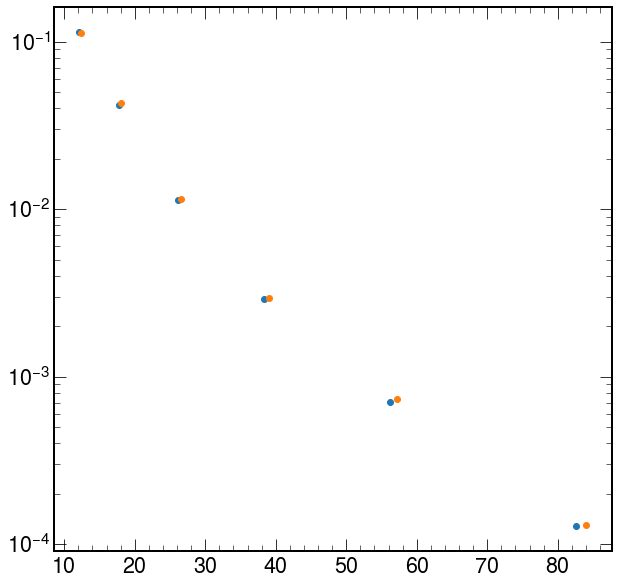

In [66]:
plt.plot(pythia_x,pythia_y,'o')
plt.plot(bins_pt, rivet_pt,'o')
plt.yscale('log')

## jet transverse momentum

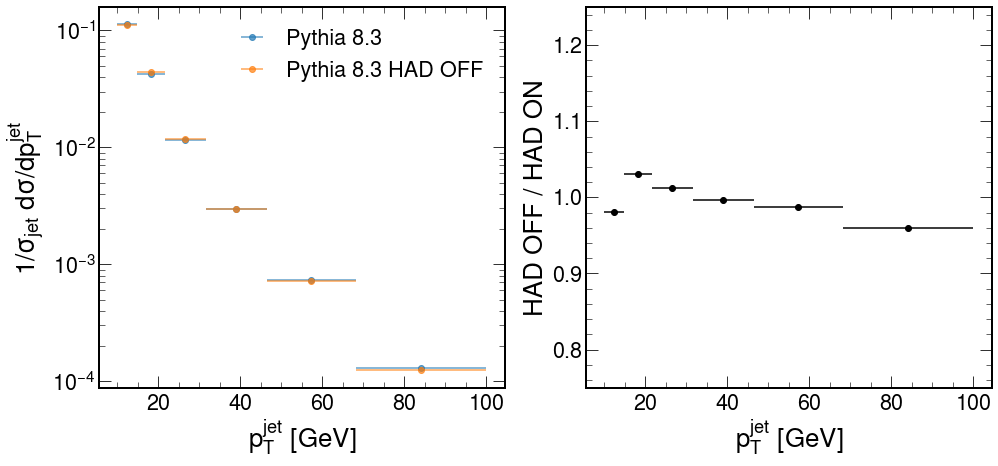

In [43]:
fig,ax = plt.subplots(1,2,figsize=(16,7))

ax[0].errorbar(bins_pt,rivet_pt,xerr=binwidth_pt,fmt='o',label='Pythia 8.3',alpha=0.7)
ax[0].errorbar(bins_pt,rivet_pt_nohad,xerr=binwidth_pt,fmt='o',label='Pythia 8.3 HAD OFF',alpha=0.7)
ax[0].set_yscale('log')
ax[0].set_xlabel('$p_{T}^{jet}$ [GeV]')
ax[0].set_ylabel(r'$1/\sigma_{jet}$ $d\sigma/dp_{T}^{jet}$')
ax[0].legend()
ratio_pt = np.divide(rivet_pt_nohad,rivet_pt)
ax[1].errorbar(bins_pt,ratio_pt,xerr=binwidth_pt,color='black',fmt='o')
ax[1].set_ylabel('HAD OFF / HAD ON')
ax[1].set_ylim([0.75,1.25])
ax[1].set_xlabel('$p_{T}^{jet}$ [GeV]')


plt.show()
fig.savefig('figures/HadronizationCorrection_jetpt.png')


## qT

In [44]:
bins_qt = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins_qt = bins_qt[1:]
bins_qt[0]=0.0
binwidth_qt= (bins_qt[1:]-bins_qt[:-1])/2.0
bins_qt = (bins_qt[1:]+bins_qt[:-1])/2.0

print(bins_qt)

[0.03255231 0.10221884 0.20541467 0.38915407 0.71630072 1.2987829
 2.33588812]


In [45]:
rivet_qt = np.array([5.756200e+04,
6.947600e+04,
5.501200e+04,
3.617400e+04,
2.029200e+04,
1.013300e+04,
1.800000e+03


])


print(sum(rivet_qt))
rivet_qt = np.divide(rivet_qt,rivet_inclusive)
rivet_qt = np.divide(rivet_qt,binwidth_qt*2.0)


250449.0


In [46]:
rivet_qt_nohad  = np.array([5.996200e+04 ,
6.992400e+04 ,
5.710600e+04 ,
3.976100e+04 ,
2.293900e+04 ,
1.133100e+04 ,
2.067000e+03 


])

print(sum(rivet_qt_nohad))
rivet_qt_nohad = np.divide(rivet_qt_nohad,rivet_inclusive_nohad)
rivet_qt_nohad = np.divide(rivet_qt_nohad,binwidth_qt*2.0)


263090.0


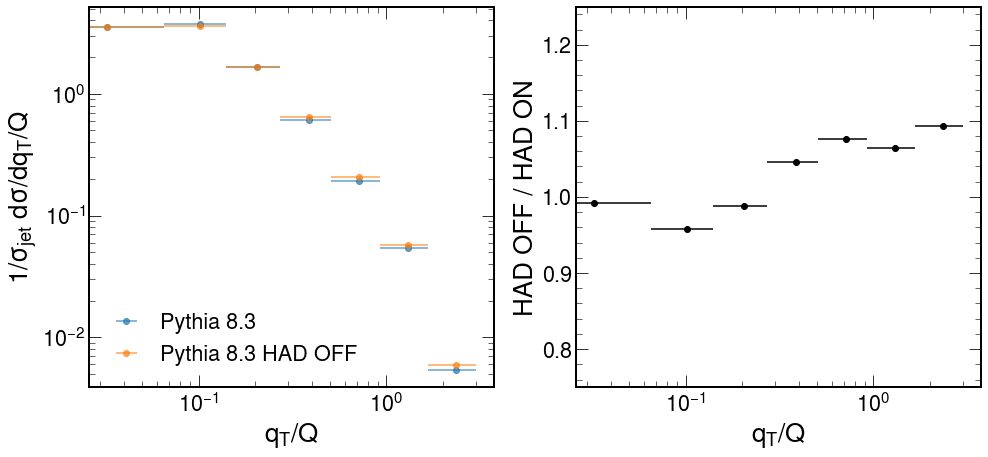

In [47]:
fig,ax = plt.subplots(1,2,figsize=(16,7))

ax[0].errorbar(bins_qt,rivet_qt,xerr=binwidth_qt,fmt='o',label='Pythia 8.3',alpha=0.7)
ax[0].errorbar(bins_qt,rivet_qt_nohad,xerr=binwidth_qt,fmt='o',label='Pythia 8.3 HAD OFF',alpha=0.7)
ax[0].set_yscale('log')
ax[0].set_xlabel('$q_{T}/Q$')
ax[0].set_ylabel(r'$1/\sigma_{jet}$ $d\sigma/dq_{T}/Q$')
ax[0].legend()

ratio_qt = np.divide(rivet_qt_nohad,rivet_qt)
ax[1].errorbar(bins_qt,ratio_qt,xerr=binwidth_qt,color='black',fmt='o')
ax[1].set_ylabel('HAD OFF / HAD ON')
ax[1].set_ylim([0.75,1.25])
ax[1].set_xlabel('$q_{T}/Q$')
ax[1].set_xscale('log')
ax[0].set_xscale('log')
fig.savefig('figures/HadronizationCorrection_jetqt.png')


## eta

In [48]:
bins_eta = np.linspace(-1.0,2.5,6)
binwidth_eta= (bins_eta[1:]-bins_eta[:-1])/2.0
bins_eta = (bins_eta[1:]+bins_eta[:-1])/2.0

print(bins_eta)

[-0.65  0.05  0.75  1.45  2.15]


In [49]:
rivet_eta = np.array([6.328700e+04,
1.097340e+05,
5.464600e+04,
1.702400e+04,
5.834000e+03


 ])



print(sum(rivet_eta))
rivet_eta = np.divide(rivet_eta,rivet_inclusive)
rivet_eta = np.divide(rivet_eta,binwidth_eta*2.0)


250525.0


In [50]:
rivet_eta_nohad = np.array([7.538100e+04 ,
1.144220e+05 ,
5.119200e+04 ,
1.653600e+04 ,
5.639000e+03 


 ])



print(sum(rivet_eta_nohad))
rivet_eta_nohad = np.divide(rivet_eta_nohad,rivet_inclusive_nohad)
rivet_eta_nohad = np.divide(rivet_eta_nohad,binwidth_eta*2.0)


263170.0


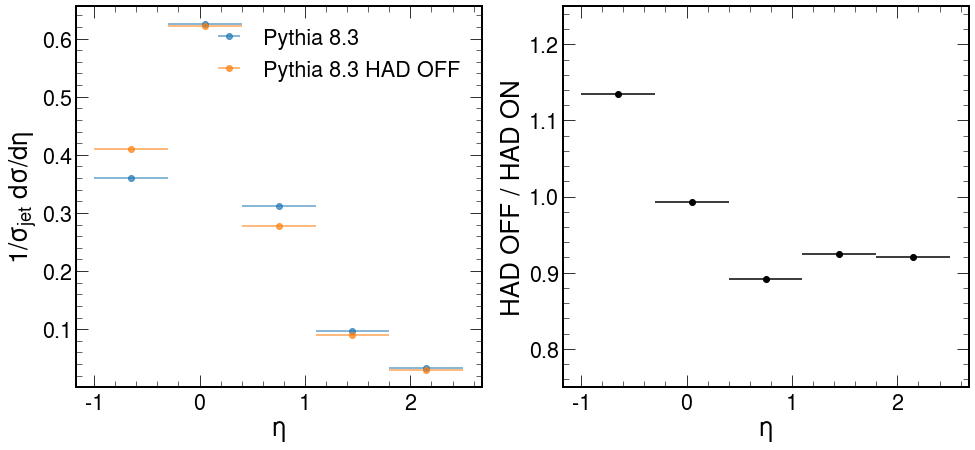

In [51]:
fig,ax = plt.subplots(1,2,figsize=(16,7))

ax[0].errorbar(bins_eta,rivet_eta,xerr=binwidth_eta,fmt='o',label='Pythia 8.3',alpha=0.7)
ax[0].errorbar(bins_eta,rivet_eta_nohad,xerr=binwidth_eta,fmt='o',label='Pythia 8.3 HAD OFF',alpha=0.7)
#ax[0].set_yscale('log')
ax[0].set_xlabel('$\eta$')
ax[0].set_ylabel(r'$1/\sigma_{jet}$ $d\sigma/d\eta$')
ax[0].legend()

ratio_eta = np.divide(rivet_eta_nohad,rivet_eta)
ax[1].errorbar(bins_eta,ratio_eta,xerr=binwidth_eta,color='black',fmt='o')
ax[1].set_ylabel('HAD OFF / HAD ON')
ax[1].set_ylim([0.75,1.25])
ax[1].set_xlabel('$\eta$')
#ax[1].set_xscale('log')
#ax[0].set_xscale('log')
fig.savefig('figures/HadronizationCorrection_jeteta.png')


In [52]:

bins_dphi = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins_dphi = bins_dphi[1:]
bins_dphi[0] = 0.0

binwidth_dphi= (bins_dphi[1:]-bins_dphi[:-1])/2.0
bins_dphi = (bins_dphi[1:]+bins_dphi[:-1])/2.0

print(bins_eta)


rivet_dphi = np.array([7.366900e+04,
4.897900e+04,
4.368600e+04,
3.135800e+04,
2.243800e+04,
1.456500e+04,
8.737000e+03


 ])



print(sum(rivet_dphi))
rivet_dphi = np.divide(rivet_dphi,rivet_inclusive)
rivet_dphi = np.divide(rivet_dphi,binwidth_dphi*2.0)





[-0.65  0.05  0.75  1.45  2.15]
243432.0


In [53]:

rivet_dphi_nohad = np.array([7.570900e+04,
5.006000e+04,
4.475900e+04,
3.361100e+04,
2.481900e+04,
1.643000e+04,
9.721000e+03
])
print(sum(rivet_dphi_nohad))
rivet_dphi_nohad = np.divide(rivet_dphi_nohad,rivet_inclusive_nohad)
rivet_dphi_nohad = np.divide(rivet_dphi_nohad,binwidth_dphi*2.0)



255109.0


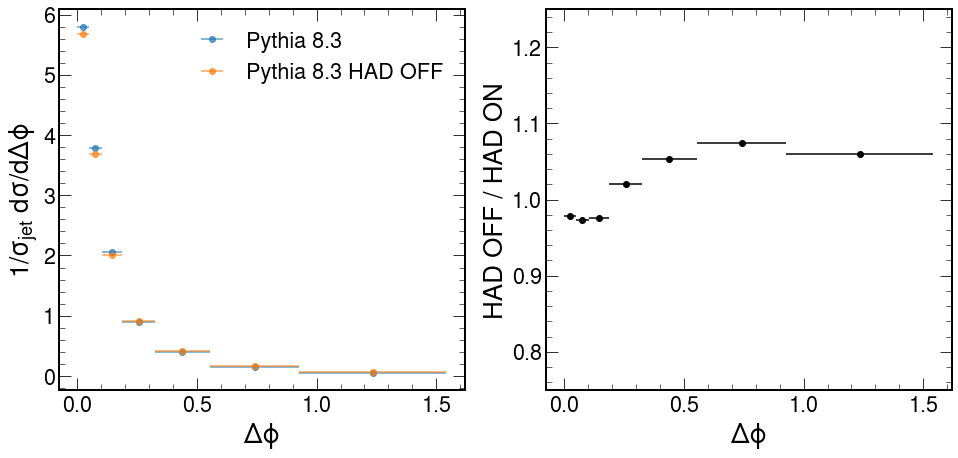

In [54]:
fig,ax = plt.subplots(1,2,figsize=(16,7))

ax[0].errorbar(bins_dphi,rivet_dphi,xerr=binwidth_dphi,fmt='o',label='Pythia 8.3',alpha=0.7)
ax[0].errorbar(bins_dphi,rivet_dphi_nohad,xerr=binwidth_dphi,fmt='o',label='Pythia 8.3 HAD OFF',alpha=0.7)
#ax[0].set_yscale('log')
ax[0].set_xlabel('$\Delta\phi$')
ax[0].set_ylabel(r'$1/\sigma_{jet}$ $d\sigma/d\Delta\phi$')
ax[0].legend()

ratio_dphi = np.divide(rivet_dphi_nohad,rivet_dphi)
ax[1].errorbar(bins_dphi,ratio_dphi,xerr=binwidth_dphi,color='black',fmt='o')
ax[1].set_ylabel('HAD OFF / HAD ON')
ax[1].set_ylim([0.75,1.25])
ax[1].set_xlabel('$\Delta\phi$')
#ax[1].set_xscale('log')
#ax[0].set_xscale('log')
fig.savefig('figures/HadronizationCorrection_jetdphi.png')


In [55]:
print(ratio_pt)
print(ratio_eta)
print(ratio_qt)
print(ratio_dphi)
with open('outputfiles/HadronizationCorrections.npy', 'wb') as f:
    np.save(f, ratio_pt)
    np.save(f, ratio_eta)
    np.save(f, ratio_qt)
    np.save(f, ratio_dphi)

[0.98076902 1.03136973 1.01227898 0.99658983 0.9867386  0.95952519]
[1.13408833 0.99281384 0.89195556 0.92484372 0.92031218]
[0.99183569 0.95827676 0.98837967 1.04655068 1.07633912 1.06470598
 1.0933708 ]
[0.97850316 0.97315144 0.97552318 1.02054598 1.0531728  1.07405513
 1.05937106]


In [56]:
with open('outputfiles/HadronizationCorrections.npy','rb') as f:
    x = np.load(f)
    y= np.load(f)
    w = np.load(f)
    z = np.load(f)
print (x)
print(y)
print(w)
print(z)

[0.98076902 1.03136973 1.01227898 0.99658983 0.9867386  0.95952519]
[1.13408833 0.99281384 0.89195556 0.92484372 0.92031218]
[0.99183569 0.95827676 0.98837967 1.04655068 1.07633912 1.06470598
 1.0933708 ]
[0.97850316 0.97315144 0.97552318 1.02054598 1.0531728  1.07405513
 1.05937106]


In [57]:
print(rivet_pt)
with open('outputfiles/Rivet_jetpt.npy', 'wb') as f:
    np.save(f, rivet_pt)

print(rivet_qt)
with open('outputfiles/Rivet_qt.npy', 'wb') as f:
    np.save(f, rivet_qt)

print(rivet_dphi)
with open('outputfiles/Rivet_dphi.npy', 'wb') as f:
    np.save(f, rivet_dphi)
    
print(rivet_eta)
with open('outputfiles/Rivet_jeteta.npy', 'wb') as f:
    np.save(f, rivet_eta)

[0.11244583 0.04278314 0.01153949 0.0029655  0.00073364 0.00012915]
[3.52990627 3.7368314  1.66182757 0.61374065 0.19336285 0.05423081
 0.00541054]
[5.80122988 3.78546061 2.05862039 0.90096416 0.39306871 0.1555679
 0.056898  ]
[0.36095707 0.62586729 0.31167317 0.09709629 0.03327419]
